<a href="https://colab.research.google.com/github/jinhqian/LING-L645/blob/main/Practical2_Beamsearch/Beamsearch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from math import log
import numpy as np

# beam search
def beam_search_decoder(data, k):
    sequences = [[list(), 0.0]]
    # walk over each step in sequence

    max_T, max_A = data.shape

    # Loop over time
    for t in range(max_T):
        all_candidates = list()
        # expand each current candidate
        for i in range(len(sequences)):
            seq, score = sequences[i]
            # Loop over possible alphabet outputs
            for c in range(max_A):
                candidate = [seq + [c], score - log(data[t, c])]
                all_candidates.append(candidate)
        # order all candidates by score
        ordered = sorted(all_candidates, key=lambda tup:tup[1])
        # select k best
        sequences = ordered[:k]
    return sequences

# define a sequence of 10 words (rows) over a vocab of 5 words (columns), 
# e.g.
#      a  bites cat  dog  the
# 1   0.1  0.2  0.3  0.4  0.5
# 2   0.5  0.3  0.5  0.2  0.1
# ...
# 10  0.3  0.4  0.5  0.2  0.1 

data = [[0.1, 0.2, 0.3, 0.4, 0.5],
        [0.4, 0.3, 0.5, 0.2, 0.1],
        [0.1, 0.2, 0.3, 0.4, 0.5],
        [0.5, 0.4, 0.3, 0.2, 0.1],
        [0.1, 0.2, 0.3, 0.4, 0.5],
        [0.5, 0.4, 0.3, 0.2, 0.1],
        [0.1, 0.2, 0.3, 0.4, 0.5],
        [0.5, 0.4, 0.3, 0.2, 0.1],
        [0.1, 0.2, 0.3, 0.4, 0.5],
        [0.3, 0.4, 0.5, 0.2, 0.1]]

data = np.array(data)

beam_width = 3

# decode sequence
result = beam_search_decoder(data, beam_width)
# print result
for i, seq in enumerate(result):
    print(i, seq)

0 [[4, 2, 4, 0, 4, 0, 4, 0, 4, 2], 6.931471805599453]
1 [[4, 2, 4, 0, 4, 0, 4, 0, 4, 1], 7.154615356913663]
2 [[4, 2, 4, 0, 4, 0, 4, 0, 3, 2], 7.154615356913663]


In [2]:
# load output JSON file 

import json
jsonfile = json.load(open('output.json'))
logits = np.array(jsonfile['logits'])
logits.shape

(107, 28)

In [3]:
result = beam_search_decoder(logits, 10)
# print(result)

for i, seq in enumerate(result):
    output = ' '
    for character in seq[0]:
        alphabet = jsonfile["alphabet"][character]
        # print(alphabet)
        if alphabet != output[-1]:
           output += alphabet
    print(output)
  

 we mustsois find a newose tholme in the stsar es
 we mustsois find a newos tholme in the stsar es
 we mustsois find a newose tholme in the stsar os
 we mustsois find a newose tholme in the stsares
 we mustsois find a newos tholme in the stsar os
 we mustsois find a newoe tholme in the stsar es
 we mustsois find a newos tholme in the stsares
 we mustsois find a newoes tholme in the stsar es
 we mustsois find a newose tholme in the stsaros
 we mustsois find a newoe tholme in the stsar os


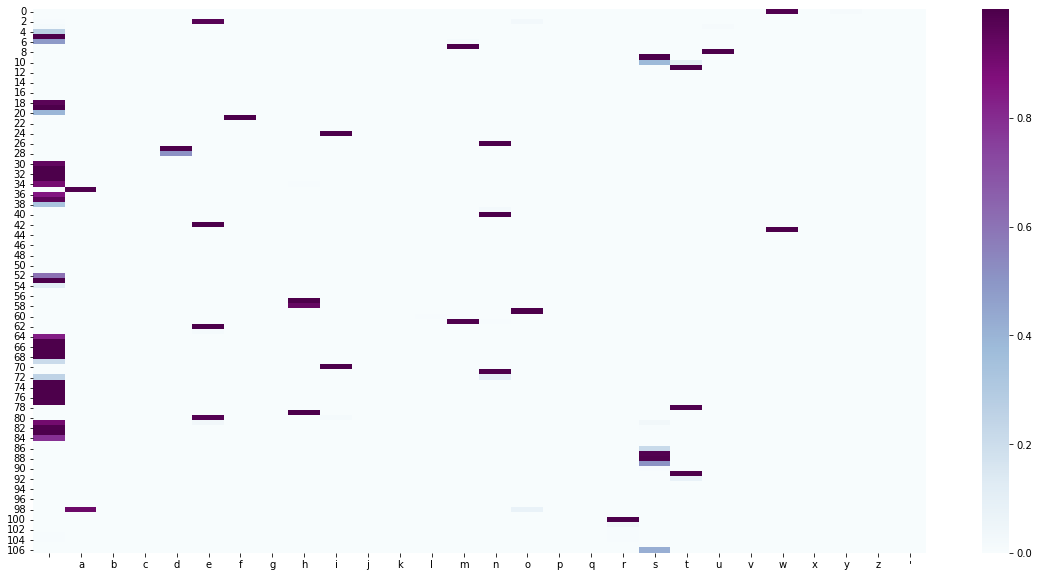

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
sns.heatmap(logits, annot=False, cbar=True, cmap="BuPu")
plt.xticks(np.arange(len(jsonfile['alphabet']))+0.5, jsonfile['alphabet'])
plt.show()